# Importação das Bibliotecas e Upload do(s) Arquivo(s)

In [6]:
# Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plot

In [7]:
# Definindo o Estilo a ser Utilizado pelo matplotlib
plot.style.use('seaborn-bright')

In [8]:
# Upload do Arquivo Externo
from google.colab import files
arq = files.upload()

Saving USA_cars.csv to USA_cars.csv


In [9]:
# Criando o Dataframe
df = pd.read_csv('USA_cars.csv')
# Exibindo as 5 Primeiras Linhas do DF
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# Preparação dos Dados

In [10]:
# Exibição do Tipo de Dado de Cada Coluna
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [11]:
# Dimensão da Matriz de Dados
df.shape

(2499, 13)

In [12]:
# Verificando a Existência de Valores Nulos 
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [13]:
# Excluindo Colunas Desnecessárias
df.drop(columns = ['Unnamed: 0','vin','lot','country','condition'], inplace = True)
# Dimensão da Matriz de Dados
df.shape

(2499, 8)

In [14]:
# Exibindo as 5 Primeiras Linhas do DF
df.head()

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida


In [15]:
# Convertendo de Milhas para Kilometros
df['mileage'] = df['mileage'] * (1.61)
# Alterando a Forma de Vizualização dos Dados em Float64
pd.options.display.float_format = '{:20,.2f}'.format
# Exibindo as 5 Primeiras Linhas do DF
df.head()

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,"441,328.37",black,new jersey
1,2899,ford,se,2011,clean vehicle,"306,788.72",silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,"63,739.90",silver,georgia
3,25000,ford,door,2014,clean vehicle,"103,275.06",blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,"10,712.94",red,florida


In [16]:
# Renomeando as Colunas
df = df.rename(columns={'price':'Preço','brand':'Marca','model':'Modelo',
                        'year':'Ano','title_status':'Condição',
                        'mileage':'Quilometragem','color':'Cor','state':'Estado'})
# Exibindo as 5 Primeiras Linhas do DF
df.head()

,Preço,Marca,Modelo,Ano,Condição,Quilometragem,Cor,Estado
0,6300,toyota,cruiser,2008,clean vehicle,"441,328.37",black,new jersey
1,2899,ford,se,2011,clean vehicle,"306,788.72",silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,"63,739.90",silver,georgia
3,25000,ford,door,2014,clean vehicle,"103,275.06",blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,"10,712.94",red,florida


In [17]:
# Características Gerais dos Dados
df.describe()

,Preço,Ano,Quilometragem
count,"2,499.00","2,499.00","2,499.00"
mean,"18,767.67","2,016.71","84,200.88"
std,"12,116.09",3.44,"96,125.88"
min,0.00,"1,973.00",0.00
25%,"10,200.00","2,016.00","34,561.07"
50%,"16,900.00","2,018.00","56,937.65"
75%,"25,555.50","2,019.00","102,190.73"
max,"84,900.00","2,020.00","1,638,876.96"


In [18]:
# Inconsistência: Valores Nulos na Série "Preço"
Preco_Nulo = df.loc[(df['Preço'] == 0)]
Preco_Nulo.shape

(43, 8)

In [19]:
# Inconsistência: Valores Nulos na Série "Quilometragem"
Quilo_Nulo = df.loc[(df['Quilometragem'] == 0)]
Quilo_Nulo.shape

(6, 8)

In [20]:
# Substituiremos Seus Valores 0 Pela Média (Preço e Quilometragem)
# Loading...
Preco_Nulo['Preço']

141    0
144    0
196    0
285    0
290    0
293    0
297    0
305    0
309    0
310    0
313    0
314    0
318    0
322    0
323    0
330    0
331    0
339    0
344    0
347    0
349    0
351    0
354    0
355    0
370    0
371    0
391    0
400    0
410    0
419    0
420    0
421    0
435    0
443    0
455    0
496    0
506    0
510    0
514    0
516    0
522    0
530    0
545    0
Name: Preço, dtype: int64

In [21]:
# Loading...
Quilo_Nulo['Quilometragem']

309                    0.00
322                    0.00
504                    0.00
545                    0.00
1236                   0.00
1619                   0.00
Name: Quilometragem, dtype: float64

# Obtenção dos Resultados

In [22]:
# Exibindo as 5 Primeiras Linhas do DF
df.head()

,Preço,Marca,Modelo,Ano,Condição,Quilometragem,Cor,Estado
0,6300,toyota,cruiser,2008,clean vehicle,"441,328.37",black,new jersey
1,2899,ford,se,2011,clean vehicle,"306,788.72",silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,"63,739.90",silver,georgia
3,25000,ford,door,2014,clean vehicle,"103,275.06",blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,"10,712.94",red,florida


In [23]:
# Exibição do Tipo de Dado de Cada Coluna
df.dtypes

Preço              int64
Marca             object
Modelo            object
Ano                int64
Condição          object
Quilometragem    float64
Cor               object
Estado            object
dtype: object

# Plotagem dos Gráficos

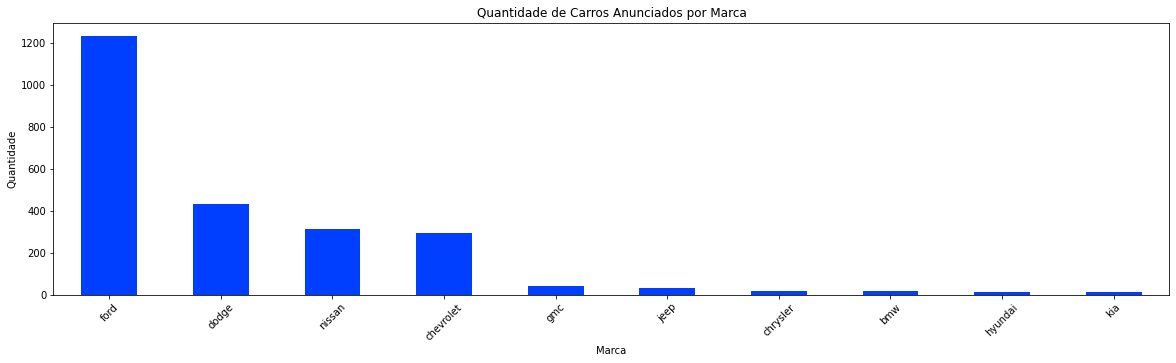

In [166]:
# Gráfico da Quantidade de Carros Anunciados por Marca
# Considerando as 10 Mais Anunciadas
Qtde_Marca = df['Marca'].value_counts()
Qtde_Marca[0:10].plot.bar(figsize = [20,5])
plot.title('Quantidade de Carros Anunciados por Marca')
plot.xlabel('Marca')
plot.xticks(rotation = 45)
plot.ylabel('Quantidade');

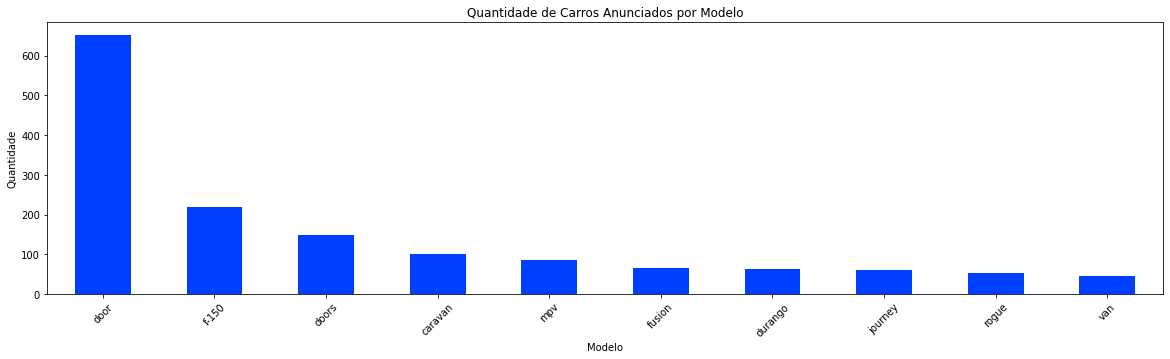

In [165]:
# Gráfico da Quantidade de Carros Anunciados por Modelo
# Considerando as 10 Mais Anunciadas
Qtde_Modelo = df['Modelo'].value_counts()
Qtde_Modelo[0:10].plot.bar(figsize = [20,5])
plot.title('Quantidade de Carros Anunciados por Modelo')
plot.xlabel('Modelo')
plot.xticks(rotation = 45)
plot.ylabel('Quantidade');

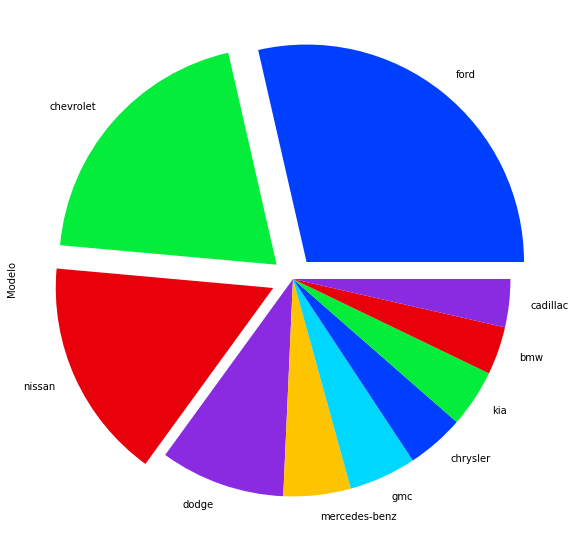

In [133]:
# Gráfico da Quantidade de Modelos Anunciados por cada Marca
# Considerando as 10 Mais Anunciadas
# Colocando em Evidência as 3 Maiores
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0)

Marca_Modelo = df.groupby('Marca')['Modelo'].nunique()
Marca_Modelo_Sort = Marca_Modelo.sort_values(ascending = False)
Marca_Modelo_Sort[0:10].plot.pie(figsize = [10,10], explode = explode);

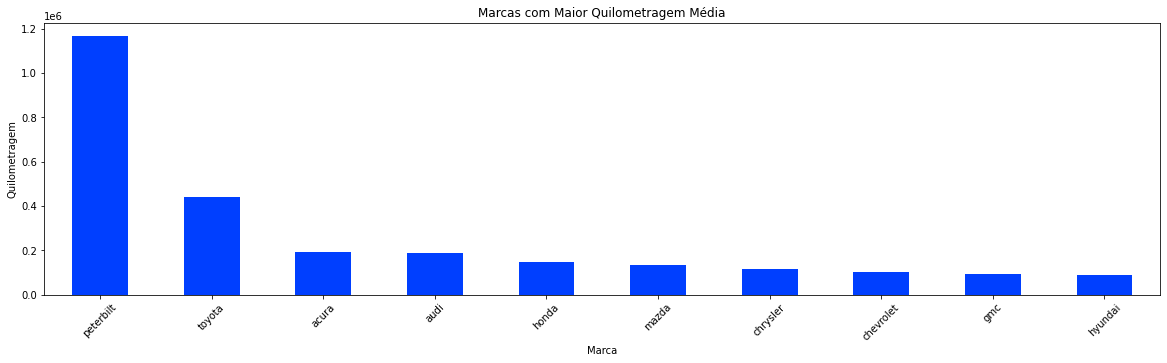

In [164]:
# Gráfico da Quilometragem dos Veículos por Marca
# Considerando as 10 Maiores Quilometragens Médias
Marca_KM = df.groupby(df['Marca'])['Quilometragem'].mean().sort_values(ascending = False)
Marca_KM[0:10].plot.bar(figsize = [20,5])
plot.title('Marcas com Maior Quilometragem Média')
plot.xlabel('Marca')
plot.xticks(rotation = 45)
plot.ylabel('Quilometragem');

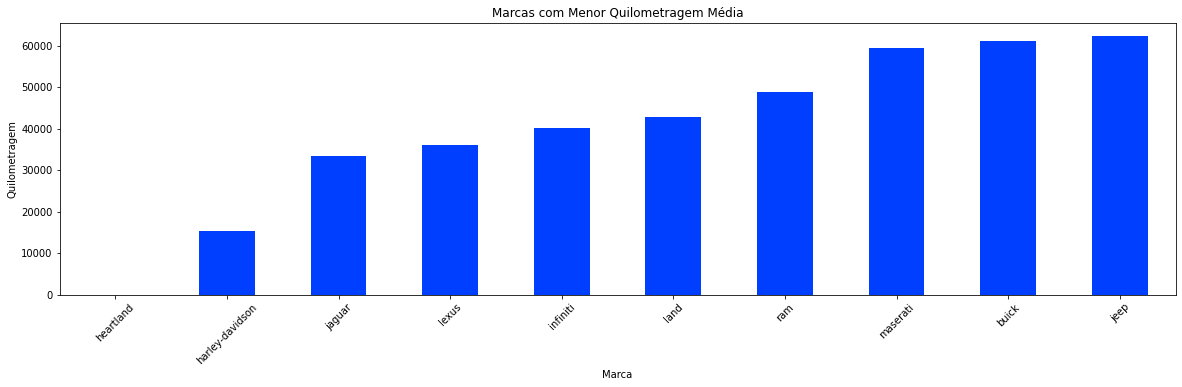

In [163]:
# Gráfico da Quilometragem dos Veículos por Marca
# Considerando as 10 Menores Quilometragens Médias
Marca_KM = df.groupby(df['Marca'])['Quilometragem'].mean().sort_values(ascending = True)
Marca_KM[0:10].plot.bar(figsize = [20,5])
plot.title('Marcas com Menor Quilometragem Média')
plot.xlabel('Marca')
plot.xticks(rotation = 45)
plot.ylabel('Quilometragem');

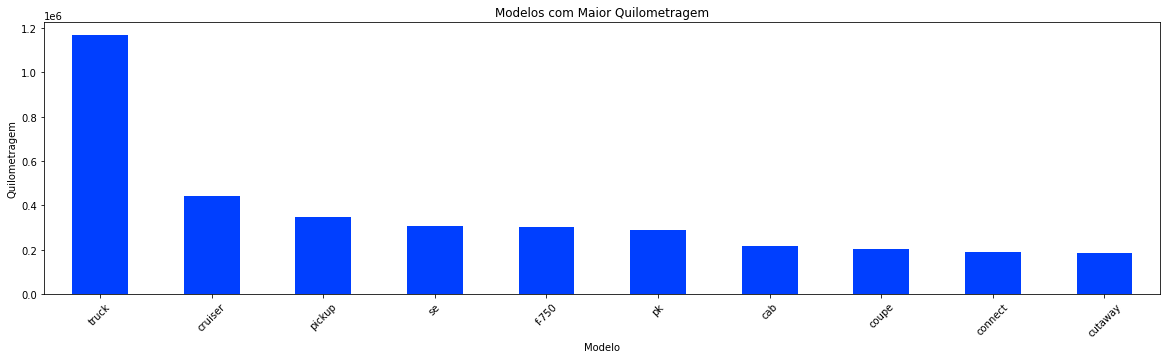

In [162]:
# Gráfico da Quilometragem dos Veículos por Modelo
# Considerando as 10 Maiores Quilometragens Médias
Modelo_KM = df.groupby(df['Modelo'])['Quilometragem'].mean().sort_values(ascending = False)
Modelo_KM[0:10].plot.bar(figsize = [20,5])
plot.title('Modelos com Maior Quilometragem')
plot.xlabel('Modelo')
plot.xticks(rotation = 45)
plot.ylabel('Quilometragem');

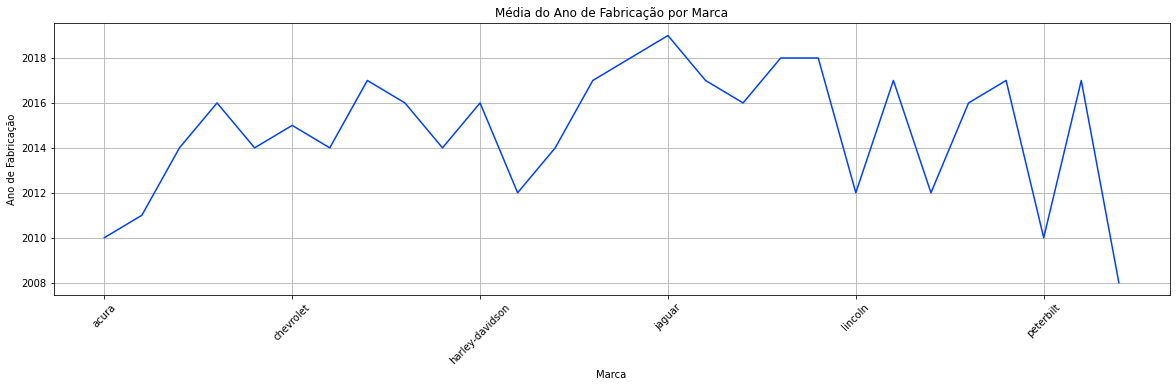

In [168]:
# Gráfico do Ano dos Veículos por Marca
df.groupby(df['Marca'])['Ano'].mean().astype('int64').plot(figsize = [20,5])
plot.title('Média do Ano de Fabricação por Marca')
plot.xlabel('Marca')
plot.xticks(rotation = 45)
plot.ylabel('Ano de Fabricação')
plot.grid();

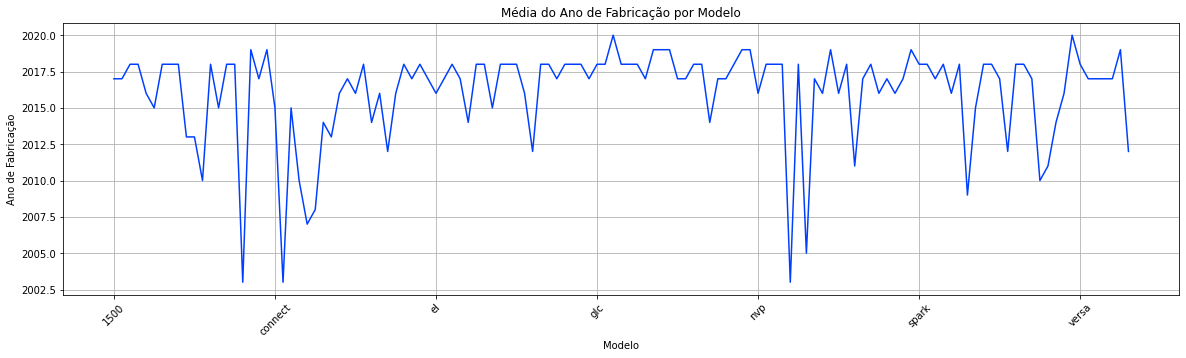

In [167]:
# Gráfico do Ano dos Veículos por Modelo
df.groupby(df['Modelo'])['Ano'].mean().astype('int64').plot(figsize = [20,5])
plot.title('Média do Ano de Fabricação por Modelo')
plot.xlabel('Modelo')
plot.xticks(rotation = 45)
plot.ylabel('Ano de Fabricação')
plot.grid();

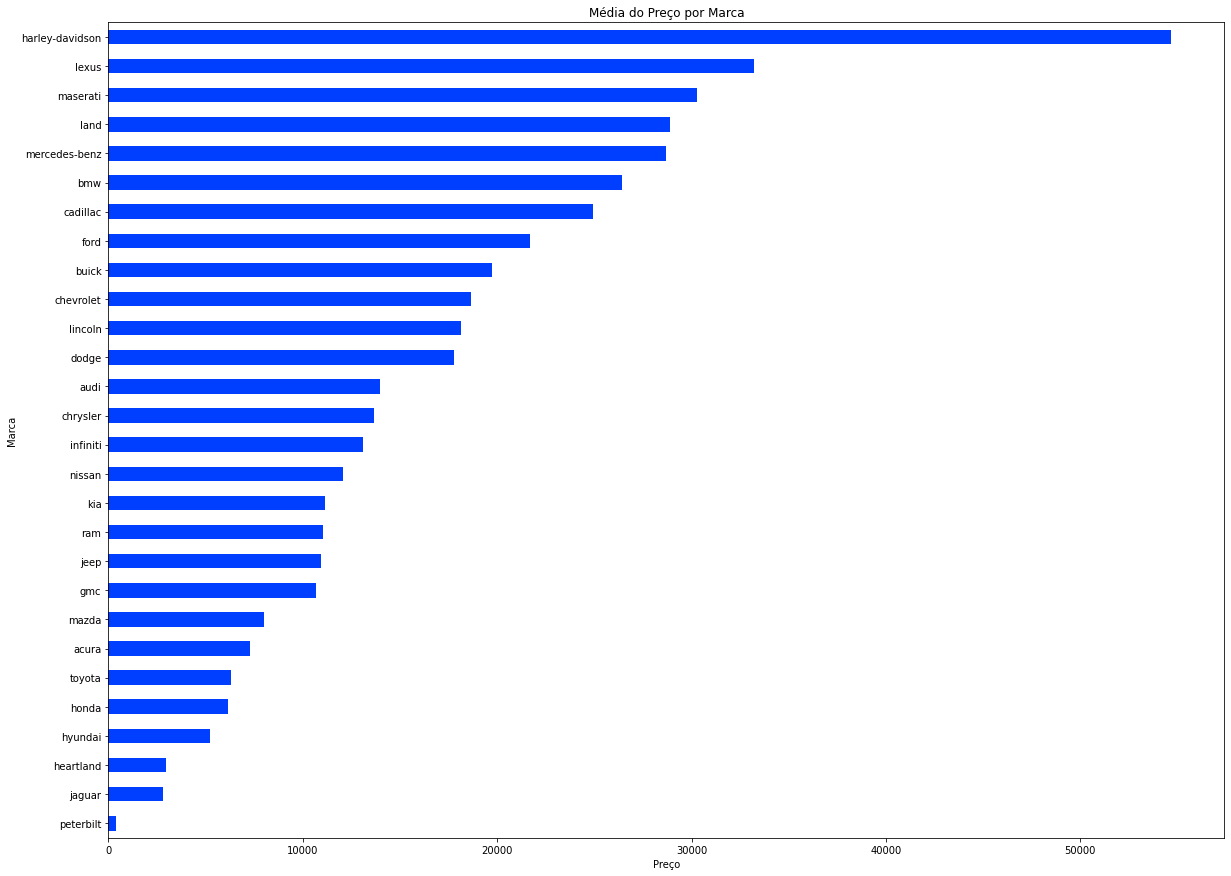

In [171]:
# Gráfico do Preço dos Veículos por Marca
df.groupby(df['Marca'])['Preço'].mean().sort_values(ascending = True).plot.barh(figsize = [20,15])
plot.title('Média do Preço por Marca')
plot.xlabel('Preço')
plot.xticks(rotation = 'horizontal')
plot.ylabel('Marca');

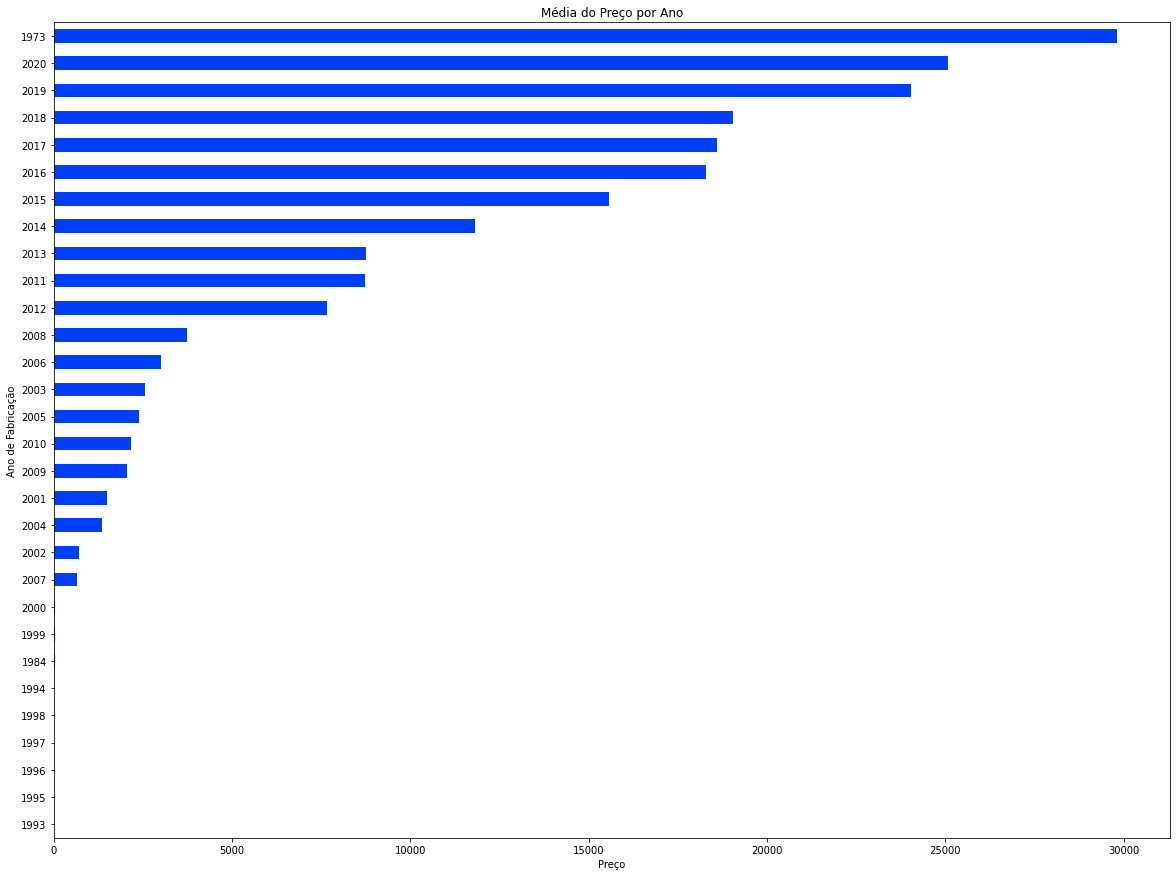

In [172]:
# Gráfico do Preço dos Veículos por Ano
df.groupby(df['Ano'])['Preço'].mean().sort_values(ascending = True).plot.barh(figsize = [20,15])
plot.title('Média do Preço por Ano')
plot.xlabel('Preço')
plot.xticks(rotation = 'horizontal')
plot.ylabel('Ano de Fabricação');

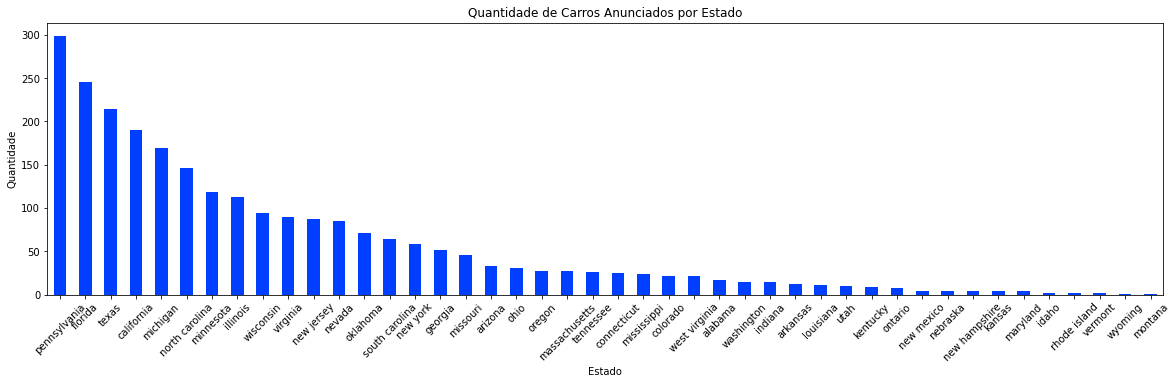

In [173]:
# Gráfico do Estado por Quantidade de Anúncios
#df['Estado'].value_counts()
#df['Estado'].value_counts().sum()
df['Estado'].value_counts().plot.bar(figsize = [20,5])
plot.title('Quantidade de Carros Anunciados por Estado')
plot.xlabel('Estado')
plot.xticks(rotation = 45)
plot.ylabel('Quantidade');

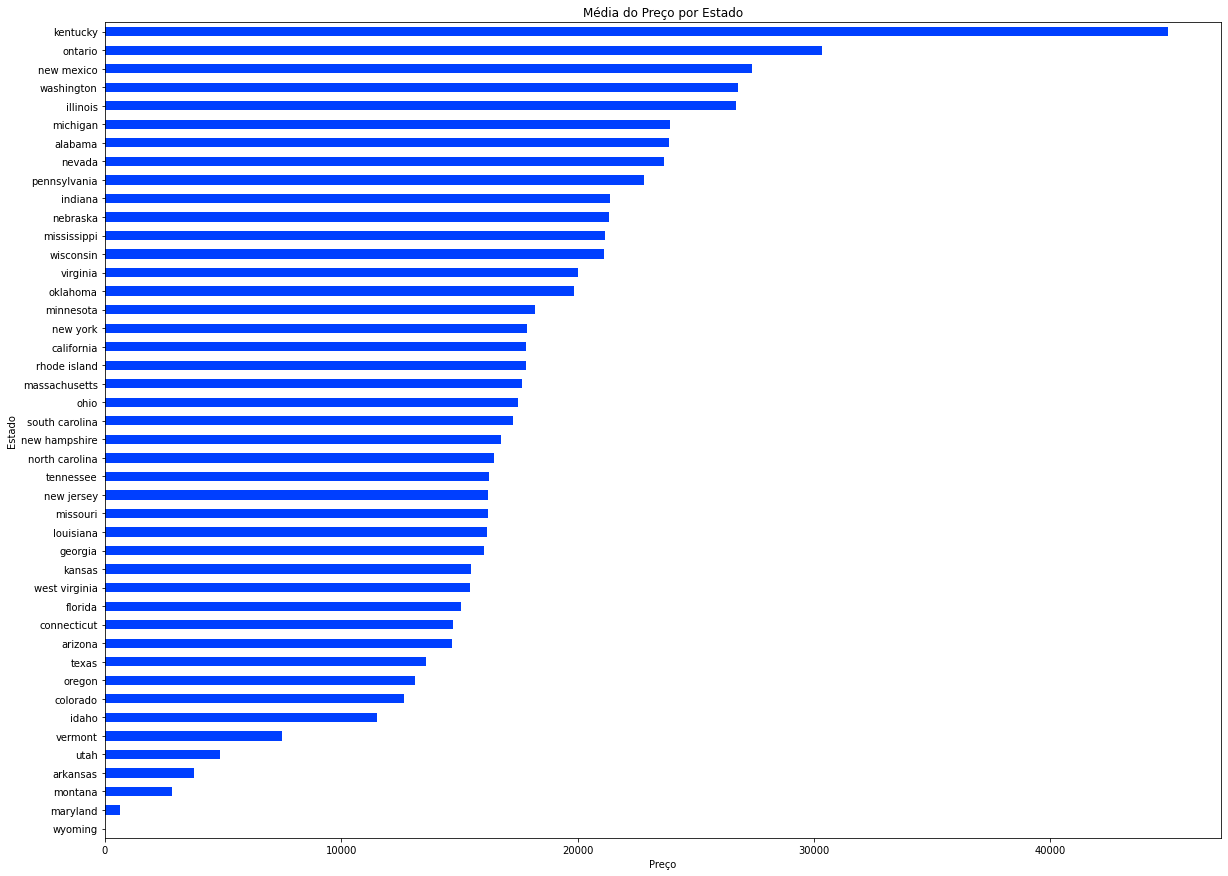

In [174]:
# Gráfico do Preço dos Veículos por Estado
df.groupby(df['Estado'])['Preço'].mean().sort_values(ascending = True).plot.barh(figsize = [20,15])
plot.title('Média do Preço por Estado')
plot.xlabel('Preço')
plot.xticks(rotation = 'horizontal')
plot.ylabel('Estado');

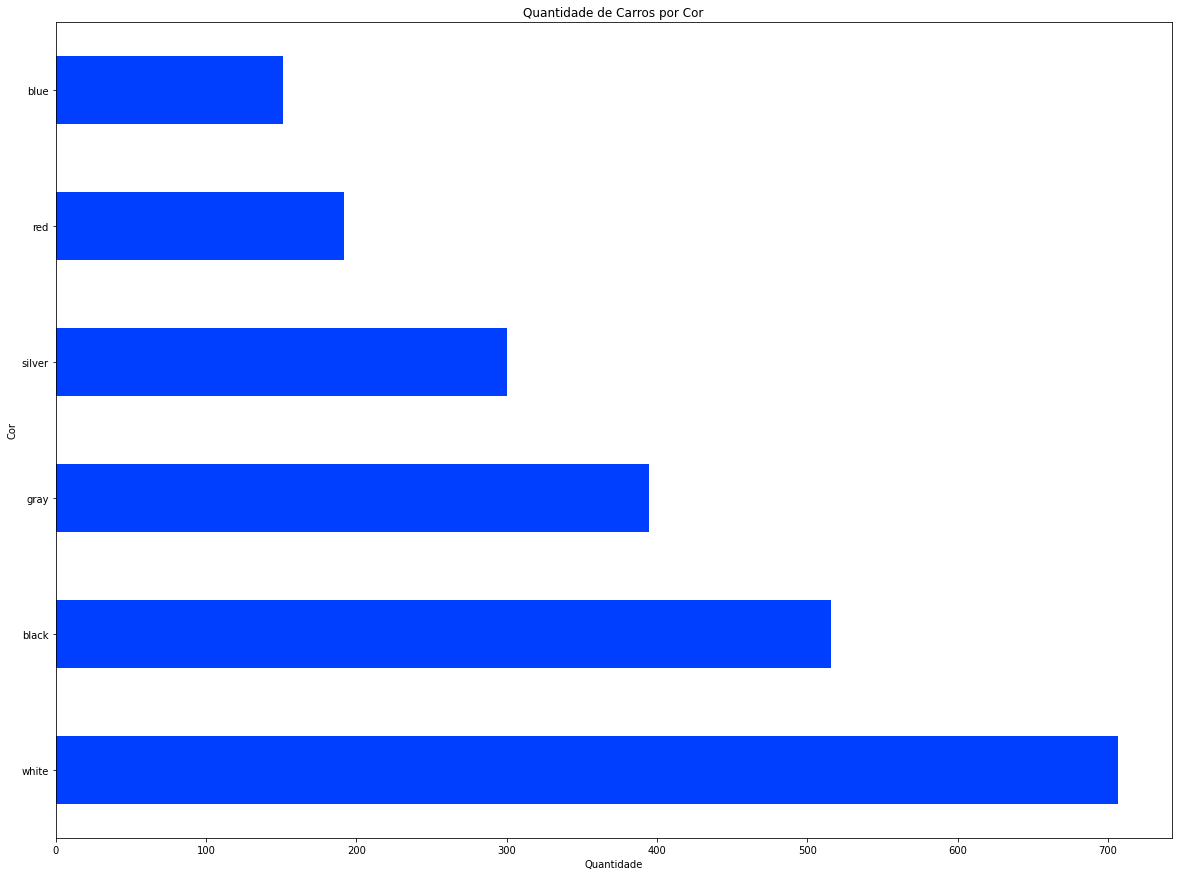

In [181]:
# Gráfico de Cores mais Comuns
# Apresentando Apenas as 6 Mais Utilizadas
Cor_Car = df['Cor'].value_counts()
Cor_Car[0:6].plot.barh(figsize = [20,15])
plot.title('Quantidade de Carros por Cor')
plot.xlabel('Quantidade')
plot.ylabel('Cor');